In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import HUXt as H
import astropy.units as u
%matplotlib inline

In [2]:
# Set up HUXt1D to run a 5 day simulation of Carrington rotation 2000, and output model data every 4 timesteps (about 35min)
cr_num = 2000
lon = 0.0
model = H.HUXt1D(cr_num, lon=lon, simtime=5, dt_scale=4)

# Get a list of different CMEs with random launch longitudes and times
cme_list=[]
n_cme = 5
launch_lons = np.random.randint(0, 5, n_cme)
daysec = 86400
launch_times = [(0.25 + i*4/n_cme)*daysec for i in range(n_cme)]
               
for lon, t_launch in zip(launch_lons, launch_times):
    cme = H.ConeCME(t_launch=t_launch, longitude=lon, width=30, v=1000, thickness=5)
    cme_list.append(cme)
    
# Run HUXt1D for these cmes, save to file 
tag = 'test'
model.solve(cme_list, save=False, tag=tag)

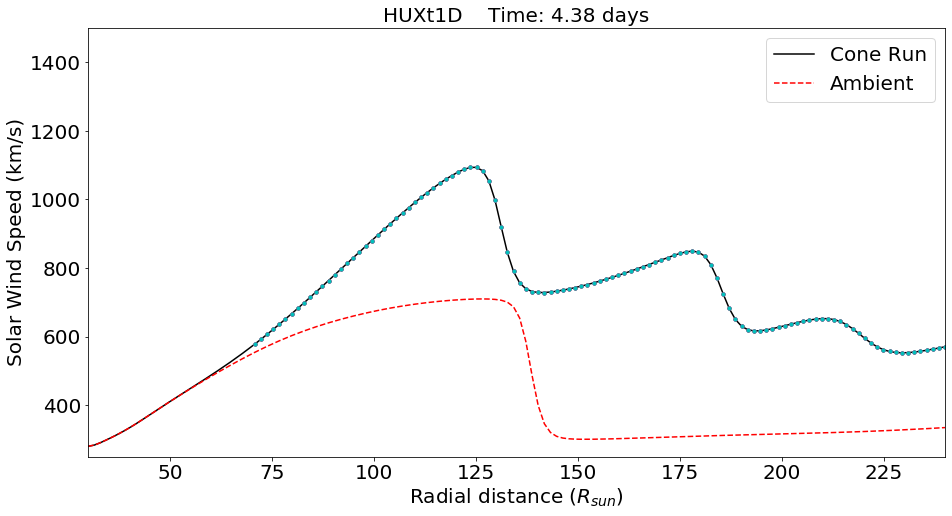

In [22]:
j = 180
fig, ax = model.plot_radial(model.time_out[j], 'both')
colors = ['c', 'm', 'b', 'darkorange']
for c, cme in enumerate(model.cmes):
    cc = np.mod(c, len(colors))
    pix = cme.coords[j]['r_pix'].value
    ax.plot(cme.coords[j]['r'], model.v_grid_cme[j,pix.astype('int32')], '.', color=colors[cc])

(<Figure size 1008x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1e85cf82160>)

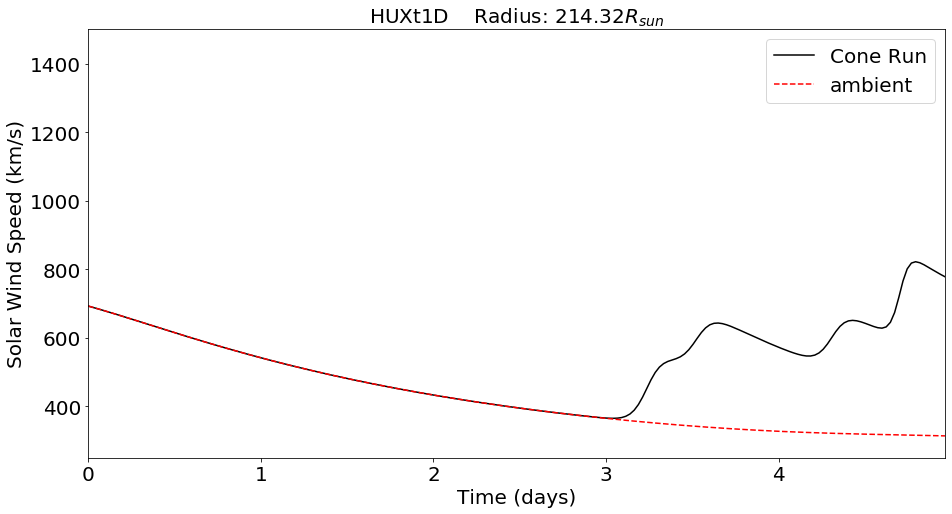

In [24]:
r_ert = (1*u.AU).to('solRad')
model.plot_timeseries(r_ert, field='both')

update save function, load function, and plotting routines for HUXt1D